In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:/Users/zzaid/OneDrive/Desktop/ttv_dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/zzaid/OneDrive/Desktop/ttv_dataset\test\Apple\4 (10).jpg
C:/Users/zzaid/OneDrive/Desktop/ttv_dataset\test\Apple\4 (31).jpg
C:/Users/zzaid/OneDrive/Desktop/ttv_dataset\test\Apple\4 (32).jpg
C:/Users/zzaid/OneDrive/Desktop/ttv_dataset\test\Apple\4 (33).jpg
C:/Users/zzaid/OneDrive/Desktop/ttv_dataset\test\Apple\4 (34).jpg
C:/Users/zzaid/OneDrive/Desktop/ttv_dataset\test\Apple\4 (35).jpg
C:/Users/zzaid/OneDrive/Desktop/ttv_dataset\test\Apple\4 (36).jpg
C:/Users/zzaid/OneDrive/Desktop/ttv_dataset\test\Apple\4 (37).jpg
C:/Users/zzaid/OneDrive/Desktop/ttv_dataset\test\Apple\4 (38).jpg
C:/Users/zzaid/OneDrive/Desktop/ttv_dataset\test\Apple\4 (4).jpg
C:/Users/zzaid/OneDrive/Desktop/ttv_dataset\test\Apple\4 (40).jpg
C:/Users/zzaid/OneDrive/Desktop/ttv_dataset\test\Apple\4 (41).jpg
C:/Users/zzaid/OneDrive/Desktop/ttv_dataset\test\Apple\4 (42).jpg
C:/Users/zzaid/OneDrive/Desktop/ttv_dataset\test\Apple\4 (43).jpg
C:/Users/zzaid/OneDrive/Desktop/ttv_dataset\test\Apple\4 (44).jpg
C:/Users/zz

In [20]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)

2.9.1


In [21]:
# Create a list with the filepaths for training and testing
train_dir = Path('C:/Users/zzaid/OneDrive/Desktop/ttv_dataset/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [22]:
test_dir = Path('C:/Users/zzaid/OneDrive/Desktop/ttv_dataset/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [23]:
val_dir = Path('C:/Users/zzaid/OneDrive/Desktop/ttv_dataset/validation')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [24]:
def image_processing(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """
      
     
  #  labels += [i.split('\\')[-3]] \
               

    labels = [str(filepath[i]).split("\\")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [25]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [26]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')
label_names = train_df.Label.unique()


-- Training set --

Number of pictures: 980

Number of different labels: 36

Labels: ['Onion' 'chocolate cake' 'ice cream' 'Apple' 'french fries' 'pasta'
 'Banana' 'kulfi' 'chapati' 'noodles' 'rice' 'grapes' 'lemon'
 'chicken curry' 'jalebi' 'sweetcorn' 'tomato' 'watermelon' 'raddish'
 'chicken 65' 'pizza' 'ginger' 'mango' 'pineapple' 'kiwi' 'Bread' 'pear'
 'potato' 'orange' 'carrot' 'eggs' 'capsicum' 'egg roll' 'cabbage'
 'cauliflower' 'chilli pepper']


In [27]:
train_df.head(5)

,Filepath,Label
0,C:\Users\zzaid\OneDrive\Desktop\ttv_dataset\tr...,Onion
1,C:\Users\zzaid\OneDrive\Desktop\ttv_dataset\tr...,chocolate cake
2,C:\Users\zzaid\OneDrive\Desktop\ttv_dataset\tr...,ice cream
3,C:\Users\zzaid\OneDrive\Desktop\ttv_dataset\tr...,Apple
4,C:\Users\zzaid\OneDrive\Desktop\ttv_dataset\tr...,french fries


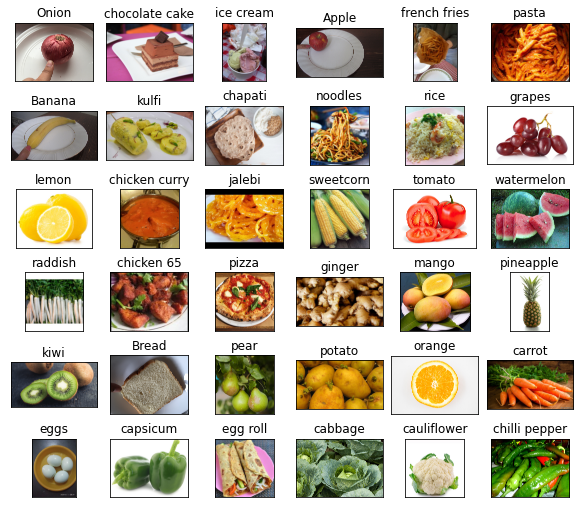

In [28]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [29]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [30]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 980 validated image filenames belonging to 36 classes.


In [31]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 980 validated image filenames belonging to 36 classes.


In [32]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 980 validated image filenames belonging to 36 classes.


In [35]:
# pretrained_model = tf.keras.applications.MobileNetV2(
#     input_shape=(224, 224, 3),
#     include_top=False,
#     weights='imagenet',
#     pooling='avg'
# )
# pretrained_model.trainable = False

In [58]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [59]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5
31/31 [==============================] - 76s 2s/step - loss: 2.0060 - accuracy: 0.5133 - val_loss: 0.7678 - val_accuracy: 0.8398
Epoch 2/5
31/31 [==============================] - 68s 2s/step - loss: 0.5007 - accuracy: 0.9010 - val_loss: 0.1749 - val_accuracy: 0.9755
Epoch 3/5
31/31 [==============================] - 68s 2s/step - loss: 0.1471 - accuracy: 0.9684 - val_loss: 0.0707 - val_accuracy: 0.9878
Epoch 4/5
31/31 [==============================] - 70s 2s/step - loss: 0.0498 - accuracy: 0.9980 - val_loss: 0.0298 - val_accuracy: 0.9990
Epoch 5/5
31/31 [==============================] - 69s 2s/step - loss: 0.0243 - accuracy: 0.9990 - val_loss: 0.0158 - val_accuracy: 1.0000


In [60]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
# labels
labels = dict((v,k) for k,v in labels.items())
labels
pred1 = [labels[k] for k in pred]
pred1


31/31 [==============================] - 35s 1s/step


['Apple',
 'Onion',
 'Onion',
 'pizza',
 'chapati',
 'pasta',
 'kulfi',
 'chocolate cake',
 'chicken curry',
 'grapes',
 'ginger',
 'noodles',
 'egg roll',
 'kulfi',
 'jalebi',
 'noodles',
 'Apple',
 'watermelon',
 'mango',
 'chicken 65',
 'noodles',
 'pineapple',
 'pizza',
 'Bread',
 'Banana',
 'raddish',
 'pasta',
 'chicken curry',
 'Onion',
 'eggs',
 'chapati',
 'chicken 65',
 'ice cream',
 'cauliflower',
 'sweetcorn',
 'french fries',
 'chicken 65',
 'egg roll',
 'chapati',
 'carrot',
 'chicken 65',
 'tomato',
 'egg roll',
 'french fries',
 'eggs',
 'french fries',
 'cauliflower',
 'Banana',
 'Banana',
 'chicken 65',
 'Banana',
 'Apple',
 'noodles',
 'chapati',
 'pasta',
 'capsicum',
 'pear',
 'rice',
 'pasta',
 'chicken 65',
 'Banana',
 'Onion',
 'chapati',
 'chapati',
 'noodles',
 'cauliflower',
 'pasta',
 'chicken 65',
 'Apple',
 'eggs',
 'carrot',
 'Onion',
 'Onion',
 'Onion',
 'Apple',
 'Apple',
 'chocolate cake',
 'Apple',
 'french fries',
 'pineapple',
 'chilli pepper',
 'On

In [62]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [71]:
img = output('C:/Users/zzaid/OneDrive/Desktop/test data/download (1).jpg')
img


1/1 [==============================] - 0s 57ms/step


'pineapple'

In [73]:
model.save('FV2.h5')